<a href="https://colab.research.google.com/github/ayushgupta-235/emotion_classifier/blob/main/image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = "/content/drive/MyDrive/imageclassifier/data"

In [ ]:
image_exts = ['jpeg','jpg','bmp','png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

In [ ]:
os.listdir(os.path.join(data_dir,'happy'))

In [ ]:
base_dir = '/content/drive/MyDrive/imageclassifier/'

# Specify the specific data directory
data_dir = 'data'
full_data_dir = base_dir + data_dir
data = tf.keras.utils.image_dataset_from_directory(full_data_dir)

Found 290 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
data_iterator

In [ ]:
batch = data_iterator.next()

In [ ]:
len(batch) #batch = (image,labels)

2

In [ ]:
#class 1 - sad
#class 0 - happy
batch[0].shape

(32, 256, 256, 3)

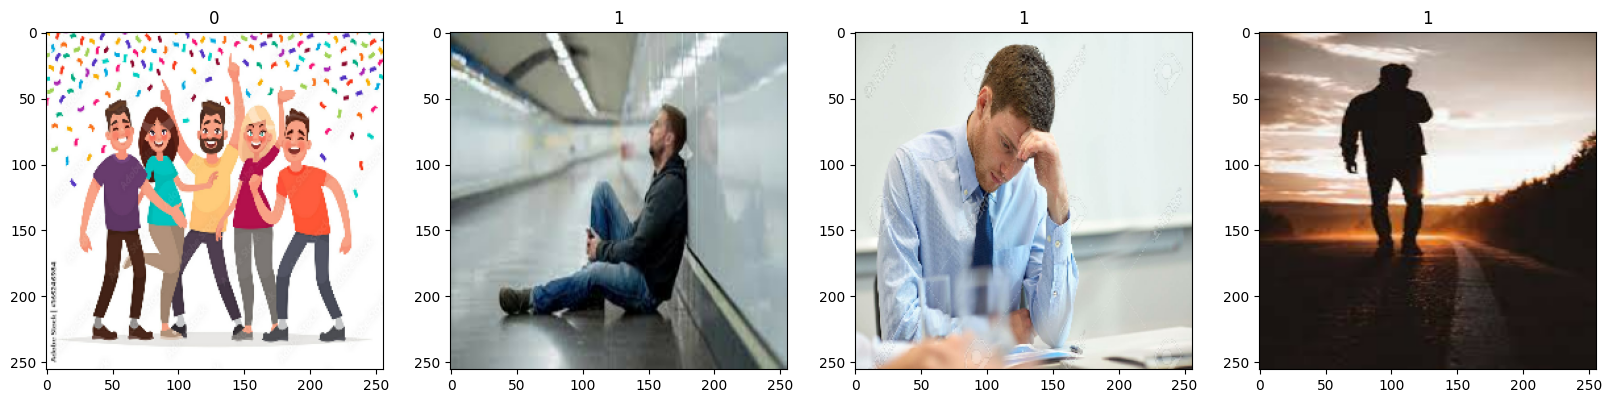

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y:(x/255,y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

In [ ]:
batch[0].max()

1.0

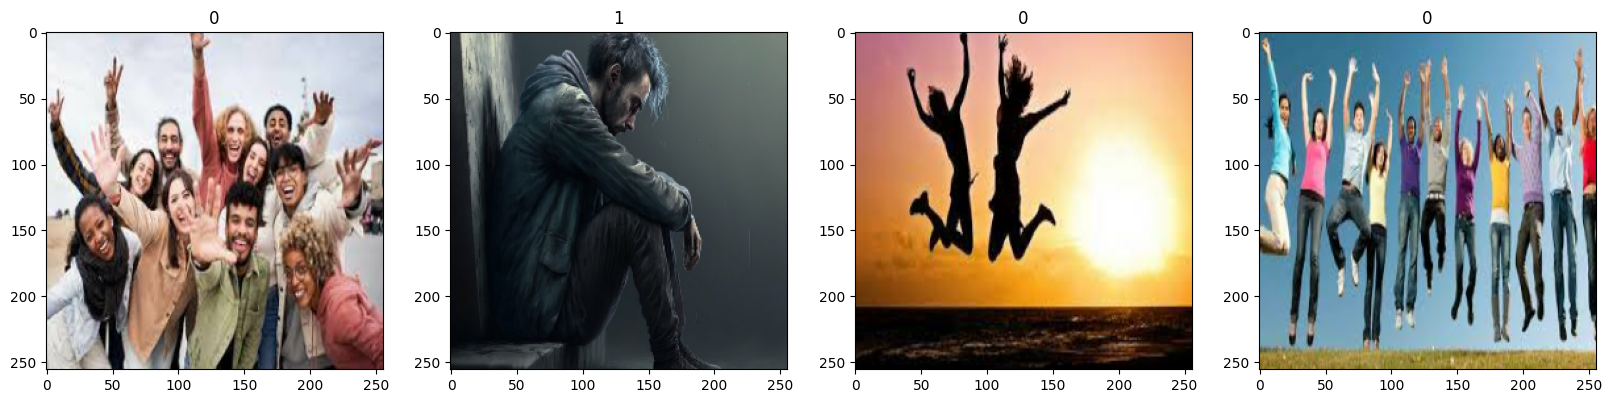

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

#class 1 - sad
#class 0 - happy

In [ ]:
for image_batch, label_batch in data:
    # Access image_batch and label_batch in your processing
    print(image_batch.shape, label_batch.shape)


(32, 256, 256, 3) (32,)
(32, 256, 256, 3) (32,)
(32, 256, 256, 3) (32,)
(32, 256, 256, 3) (32,)
(32, 256, 256, 3) (32,)
(32, 256, 256, 3) (32,)
(32, 256, 256, 3) (32,)
(32, 256, 256, 3) (32,)
(32, 256, 256, 3) (32,)
(2, 256, 256, 3) (2,)


In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)